# CIMAT Unidad Monterrey
# Ciencia de datos
# Victor Manuel Gómez Espinosa

In [5]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

#Datos ejemplo
X=np.array([10,20,23,38])
X=X.reshape(-1,1)
y=np.array([-10,6,8,-8])

# Regresión con Gradient Boosting
## Implementación algoritmo MART

In [6]:
from sklearn.tree import DecisionTreeRegressor

def GradientBoostFit(X,y,n_estimators=3,Learn_rate=0.5,max_depth=1): #MART

    #inicializar
    f0=np.mean(y) #una hoja
    
    trees=[]
    trees.append(f0)
    pred=[]
    pred.append(f0)
    
    
    M=n_estimators
    m=1
    while(m<=M): #para M arboles
        fi=pred[m-1]
        # a)residuales
        ri=y-fi
        
        # b) ajustar el arbol
        ctreei = DecisionTreeRegressor(random_state=0, max_depth=max_depth) #STUMP, CART
        ctreei.fit(X, ri)
        trees.append(ctreei)
        
        # c) obtener las salidas de cada hoja
        outputsi=ctreei.predict(X)

        # d) calcular nuevas predicciones
        fi=fi+Learn_rate*(outputsi)
        pred.append(fi)
        m=m+1
    
    
    return(trees) #modelo
    
def GradientBoostPredict(trees,X,Learn_rate=0.5): #obtiene predicciones
    
    acumV=trees[0] #valores iniciales
    for tree in trees[1:]: #predicciones por cada arbol*learning rate y acumula
        V=tree.predict(X)
        acumV=acumV+Learn_rate*V
    
    y_pred=acumV
    return(y_pred) #predicciones

### Ejemplo

In [7]:
def EjemMart(n_estimators,Learn_rate):
    trees=GradientBoostFit(X,y,n_estimators=n_estimators,Learn_rate=Learn_rate,max_depth=1) #obtiene el modelo
    y_pred=GradientBoostPredict(trees,X,Learn_rate=Learn_rate) #realiza predicciones
    
    plt.scatter(X,y,color='red',label='observed',s=100)
    plt.scatter(X,y_pred,color='blue',label='predicted',s=100,marker='x')
    plt.xlabel('X1'), plt.ylabel('y'), plt.legend(loc='upper right')
    plt.title('Implementacion MART')
    plt.show()
    return(y_pred)

In [8]:
interact(EjemMart,n_estimators=(1,10),Learn_rate=(0.1,0.9))

interactive(children=(IntSlider(value=5, description='n_estimators', max=10, min=1), FloatSlider(value=0.5, de…

<function __main__.EjemMart(n_estimators, Learn_rate)>

## Con Scikit-learn

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

[-9.00218984  6.18097941  6.18097941 -7.35976899]


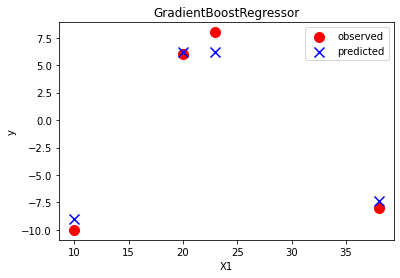

In [11]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=1, 
            n_estimators=10,
            learning_rate=0.5,
            random_state=2)

# Fit gb to the training set
gb.fit(X,y)

# Predict test set labels
y_pred = gb.predict(X)
print(y_pred)

#plot
plt.scatter(X,y,color='red',label='observed',s=100)
plt.scatter(X,y_pred,color='blue',label='predicted',s=100,marker='x')
plt.xlabel('X1'), plt.ylabel('y'), plt.legend(loc='upper right')
plt.title('GradientBoostRegressor')
plt.show()

## Para clasificación revisa:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier